In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
tot_r = pd.read_csv('./magazine/final/video_rose_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
tot_r['ADFN_2'] = tot_r['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
tot_r['ADFN_2']

0      [돌파, How, like, that, 뮤직비디오, 숨겨진, 메이크업, 디테, 가득...
1      [로제, 시폰, 드레스, 쿨하게, 싶다면, 플라워, 미니, 드레스, 선택, 로제, ...
2      [번짐, 기법, 활용, 변형, 레오파드, 선보인, 로제, 화이트, 베이스, 브라운,...
3      [폭, 좁고, 길어, 느낌, 색다른, 변화, 손쉽게, 있으니까, 가방, 탑, 핸들,...
4      [오버, 사이즈, 티셔츠, 원피스, 로제, 타이, 하나로, 박시하면서도, 주얼, 일...
                             ...                        
135    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
136    [로제, 매력, 가창력, 춤, 몸매, 순박함과, 멍챙함, 로제, 데이터, 걱정, 의...
137    [로제, 보석, 맴버, 패션, 분석, 쌉, 가능, CHANEL, DIOR, 버버리,...
138    [영어, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, subti...
139    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 나온, Stic...
Name: ADFN_2, Length: 140, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./tot_rose_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,로제,9341
1,예쁘다,1383
2,귀엽다,1061
3,사랑,783
4,노래,696
...,...,...
495,봐요,16
496,피처링,16
497,그것,16
498,없을,16


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', '최고', '음색', '솔로', '챙', '음악', '무대', '춤', '매력', '레전드', '느낌', '아이돌', 'LAURENT', '금발', '직캠', '코첼라', '머리카락', '인간', '바람', '여자', '영어', '여신', '공주', '창법', '입덕']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', '최고', '음색', '솔로', '챙', '음악', '무대', '춤', '매력', '레전드', '느낌', '아이돌', 'LAURENT', '금발', '직캠', '코첼라', '머리카락', '인간', '바람', '여자', '영어', '여신', '공주', '창법', '입덕', '춤선', '몸매', '사랑스럽다', '가수', '한국', '아름다운', '스타일', '분위기', '퀸', '찰떡', '실력', '패션', '발음', '짱', '스타', '라이브', '애교', '멋있다', '보컬', 'BLINK']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', '최고', '음색', '솔로', '챙', '음악', '무대', '춤', '매력', '레전드', '느낌', '아이돌', 'LAURENT', '금발', '직캠', '코첼라', '머리카락', '인간', '바람', '여자', '영어', '여신', '공주', '창법', '입덕', '춤선', '몸매', '사랑스럽다', '가수', '한국', '아름다운', '스타일', '분위기', '퀸', '찰떡', '실력', '패션', '발음', '짱', '스타', '라이브', '애교', '멋있다', '보컬', 'BLINK', '소리', '미모', '천사', '요정', '명품', '표정', '심장', '허리', '왕', '사기', '다리', '핑크', '신', '블랙', '최애', '고급', '말투', '인기', '걸그룹', '애기', '소름', '한국인', '독보', '한국어', '노력', 'ANGEL', 'GLOBAL', '코디', '눈치', '컬러', '꼭', '원', '미쳤어', 'If', '커버', '연예인', 'LOVE', '집', '브랜드', '버전', '외모', '인스타', 'BODY', 'PERFECT', 'BEAUTIFUL', '로지', '웃기', 'first', '강냉이', '물']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', '최고', '음색', '솔로', '챙', '음악', '무대', '춤', '매력', '레전드', '느낌', '아이돌', 'LAURENT', '금발', '직캠', '코첼라', '머리카락', '인간', '바람', '여자', '영어', '여신', '공주', '창법', '입덕', '춤선', '몸매', '사랑스럽다', '가수', '한국', '아름다운', '스타일', '분위기', '퀸', '찰떡', '실력', '패션', '발음', '짱', '스타', '라이브', '애교', '멋있다', '보컬', 'BLINK', '소리', '미모', '천사', '요정', '명품', '표정', '심장', '허리', '왕', '사기', '다리', '핑크', '신', '블랙', '최애', '고급', '말투', '인기', '걸그룹', '애기', '소름', '한국인', '독보', '한국어', '노력', 'ANGEL', 'GLOBAL', '코디', '눈치', '컬러', '꼭', '원', '미쳤어', 'If', '커버', '연예인', 'LOVE', '집', '브랜드', '버전', '외모', '인스타', 'BODY', 'PERFECT', 'BEAUTIFUL', '로지', '웃기', 'first', '강냉이', '물', '주황', '복면', 'ROSIE', '이지', '기분', '활동', '부를', '형', '깡패', 'sight', '음원', '특유', '보기', '장', '매일', '있으면', '성격', '메인보컬', '말랐다', '티', '먹고', '힘', '부르고', '친구', 'SOLO', 'for', '어울리는', '샤키라', '갚아', '남자', '포인트', '화보', '모델', '비주얼', '관심', '사복', '감사해요', 'in', '연습', '호주', '눈빛', '양갈래', '재능', 'be', '인어공주', '코', '기적', '착하고', '방송', '리본', '중독', '온', '팝송', '천재', '라인

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', '최고', '음색', '솔로', '챙', '음악', '무대', '춤', '매력', '레전드', '느낌', '아이돌', 'LAURENT', '금발', '직캠', '코첼라', '머리카락', '인간', '바람', '여자', '영어', '여신', '공주', '창법', '입덕', '춤선', '몸매', '사랑스럽다', '가수', '한국', '아름다운', '스타일', '분위기', '퀸', '찰떡', '실력', '패션', '발음', '짱', '스타', '라이브', '애교', '멋있다', '보컬', 'BLINK', '소리', '미모', '천사', '요정', '명품', '표정', '심장', '허리', '왕', '사기', '다리', '핑크', '신', '블랙', '최애', '고급', '말투', '인기', '걸그룹', '애기', '소름', '한국인', '독보', '한국어', '노력', 'ANGEL', 'GLOBAL', '코디', '눈치', '컬러', '꼭', '원', '미쳤어', 'If', '커버', '연예인', 'LOVE', '집', '브랜드', '버전', '외모', '인스타', 'BODY', 'PERFECT', 'BEAUTIFUL', '로지', '웃기', 'first', '강냉이', '물', '주황', '복면', 'ROSIE', '이지', '기분', '활동', '부를', '형', '깡패', 'sight', '음원', '특유', '보기', '장', '매일', '있으면', '성격', '메인보컬', '말랐다', '티', '먹고', '힘', '부르고', '친구', 'SOLO', 'for', '어울리는', '샤키라', '갚아', '남자', '포인트', '화보', '모델', '비주얼', '관심', '사복', '감사해요', 'in', '연습', '호주', '눈빛', '양갈래', '재능', 'be', '인어공주', '코', '기적', '착하고', '방송', '리본', '중독', '온', '팝송', '천재', '라인

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', '최고', '음색', '솔로', '챙', '음악', '무대', '춤', '매력', '레전드', '느낌', '아이돌', 'LAURENT', '금발', '직캠', '코첼라', '머리카락', '인간', '바람', '여자', '영어', '여신', '공주', '창법', '입덕', '춤선', '몸매', '사랑스럽다', '가수', '한국', '아름다운', '스타일', '분위기', '퀸', '찰떡', '실력', '패션', '발음', '짱', '스타', '라이브', '애교', '멋있다', '보컬', 'BLINK', '소리', '미모', '천사', '요정', '명품', '표정', '심장', '허리', '왕', '사기', '다리', '핑크', '신', '블랙', '최애', '고급', '말투', '인기', '걸그룹', '애기', '소름', '한국인', '독보', '한국어', '노력', 'ANGEL', 'GLOBAL', '코디', '눈치', '컬러', '꼭', '원', '미쳤어', 'If', '커버', '연예인', 'LOVE', '집', '브랜드', '버전', '외모']


### top50만 남기기

In [14]:
len(tot_r)

140

In [15]:
top30_word = []
for i in range(len(tot_r)):
    w=[]
    for word in tot_r.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(tot_r)):
    w=[]
    for word in tot_r.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(tot_r)):
    w=[]
    for word in tot_r.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(tot_r)):
    w=[]
    for word in tot_r.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(tot_r)):
    w=[]
    for word in tot_r.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(tot_r)):
    w=[]
    for word in tot_r.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
tot_r

,magazine,brand,title,word_rose,ADFN,ADFN_2
0,Allure,R,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,['32시간만에 1억뷰 돌파! 블랙핑크의 ‘How you like that’ 뮤직비...,"['32시간', '만에', '1억', '뷰', '돌파', '!', '블랙', '핑크...","[돌파, How, like, that, 뮤직비디오, 숨겨진, 메이크업, 디테, 가득..."
1,B,R,잘 고른 여름 원피스 한 벌,"['블랙핑크 로제', '시폰 드레스를 블랙핑크 로제처럼 쿨하게 연출하고 싶다면? 플...","['블랙', '핑크', '로제', ""',"", ""'"", '시폰', '드레스', '를'...","[로제, 시폰, 드레스, 쿨하게, 싶다면, 플라워, 미니, 드레스, 선택, 로제, ..."
2,B,R,"난리 난 블랙핑크의 네일아트, 왜?",['번짐 기법을 활용한 변형된 레오파드 패턴을 선보인 로제. 화이트 베이스 위에 브...,"['번짐', '기법', '을', '활용', '한', '변형', '된', '레오파드'...","[번짐, 기법, 활용, 변형, 레오파드, 선보인, 로제, 화이트, 베이스, 브라운,..."
3,B,R,방탄소년단 뷔도 착용한 가을 액세서리는 무엇?,"['폭이 좁고 길어 치렁치렁한 느낌 없이 색다른 변화를 손쉽게 줄 수 있으니까.',...","['폭', '이', '좁고', '길어', '치렁치렁', '한', '느낌', '없이'...","[폭, 좁고, 길어, 느낌, 색다른, 변화, 손쉽게, 있으니까, 가방, 탑, 핸들,..."
4,B,R,무더위엔 원피스 한 벌이면 충분해!,"['오버사이즈 티셔츠를 원피스처럼 연출한 블랙핑크 로제.', ' 타이다이 패턴 하나...","['오버', '사이즈', '티셔츠', '를', '원피스', '처럼', '연출', '...","[오버, 사이즈, 티셔츠, 원피스, 로제, 타이, 하나로, 박시하면서도, 주얼, 일..."
...,...,...,...,...,...,...
135,YOUTUBE,R,세상 귀욤()열매 혼자 다 먹은듯한 블랙핑크 로제 인스타라이브 (feat_ 지수_ ...,['지수 말투 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 연예인이지만 전형적인 10...,"['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',...","[말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,..."
136,YOUTUBE,R,세상에 로제도 데이터 걱정한다_인스타라이브 [블랙핑크로제]_korean_commen...,"['박로제 진짜 매력은 가창력, 춤, 몸매가 아닌 순박함과 멍챙함인 듯ㅋㅋㅋㅌㅌㅌ'...","['박로', '제', '진짜', '매력', '은', '가창력', ',', '춤', ...","[로제, 매력, 가창력, 춤, 몸매, 순박함과, 멍챙함, 로제, 데이터, 걱정, 의..."
137,YOUTUBE,R,스타일리스트가 분석한 로제 패션이 진짜 넘사벽인 이유_korean_comment.csv,"['로제가 진짜 보석인듯', '솔직히 BLACKPINK는 맴버하나하나 다 패션분석쌉...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '...","[로제, 보석, 맴버, 패션, 분석, 쌉, 가능, CHANEL, DIOR, 버버리,..."
138,YOUTUBE,R,아무데서나 볼 수 없을걸요 로제 커버 화보 촬영현장 비하인드 대방출! by W Ko...,['영어 자막이 추가되었습니다! 즐겁게 감상 부탁드려요 :)English subti...,"['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '...","[영어, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, subti..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
# top30_word

In [28]:
len(top50_word)

140

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['무대', '로제', '느낌', '로제']

In [37]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.18))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
148,"(사랑, 로제)",0.414286,"[((), (사랑, 로제), 0.4142857142857143, 1.0), ((로제...",2
161,"(음악, 로제)",0.392857,"[((), (음악, 로제), 0.39285714285714285, 1.0), ((로...",2
143,"(매력, 로제)",0.392857,"[((), (매력, 로제), 0.39285714285714285, 1.0), ((로...",2
99,"(로제, 노래)",0.385714,"[((), (로제, 노래), 0.38571428571428573, 1.0), ((노...",2
144,"(목소리, 로제)",0.350000,"[((), (목소리, 로제), 0.35, 1.0), ((로제), (목소리), 0.3...",2
159,"(예쁘다, 로제)",0.350000,"[((), (예쁘다, 로제), 0.35, 1.0), ((로제), (예쁘다), 0.3...",2
145,"(로제, 무대)",0.342857,"[((), (로제, 무대), 0.34285714285714286, 1.0), ((로...",2
163,"(챙, 로제)",0.328571,"[((), (챙, 로제), 0.32857142857142857, 1.0), ((로제...",2
101,"(목소리, 노래)",0.328571,"[((), (목소리, 노래), 0.32857142857142857, 1.0), ((...",2
82,"(귀엽다, 로제)",0.328571,"[((), (귀엽다, 로제), 0.32857142857142857, 1.0), ((...",2


### networkx 그래프 정의

In [38]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [39]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [40]:
pos = nx.spring_layout(G)

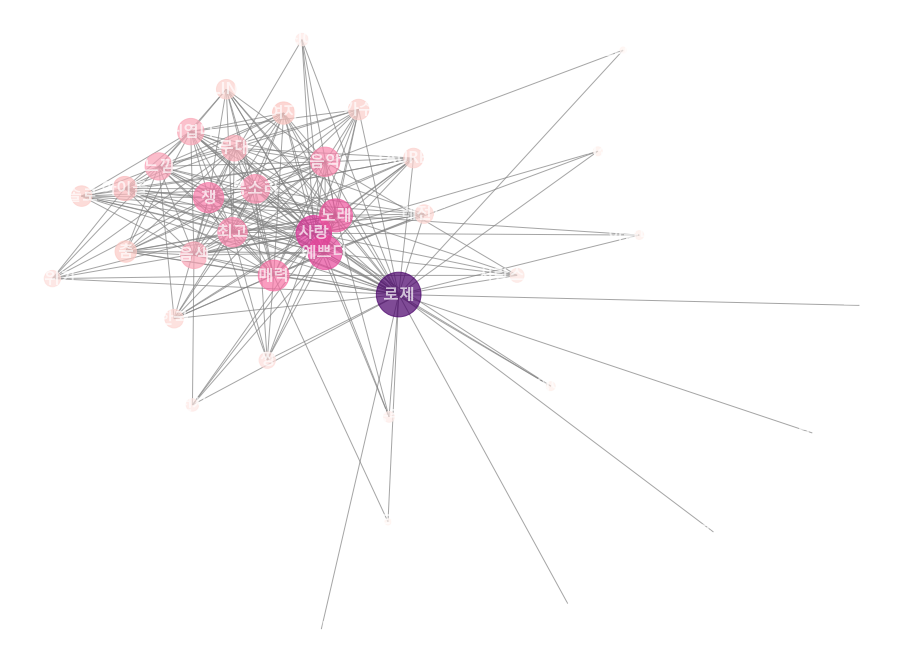

In [41]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_rose_top500_min18.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [ ]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']